In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import os
import math


Load in data

In [2]:
path = os.path.dirname(os.getcwd())
path = os.path.dirname(path)
path = os.path.join(path, 'Datasets/DUSP1')

ericData = pd.read_csv(os.path.join(path, 'DUSP1_Dex_100nM_Rep1_Rep2.csv'), index_col=0)

path = os.path.dirname(os.getcwd())
path = os.path.dirname(path)
seqAdata = sc.read_h5ad(os.path.join(path, 'Story/scvi.h5ad'))

In [3]:
ericData

,time_index,RNA_nuc,RNA_cyto,RNA_total,Rep_num
cell_number,,,,,
0,0,2,4,6,1
1,0,2,9,11,1
2,0,20,75,95,1
3,0,72,98,173,1
4,0,9,65,74,1
...,...,...,...,...,...
4555,180,46,45,92,2
4556,180,21,49,70,2
4557,180,16,51,67,2


In [4]:
seqAdata

AnnData object with n_obs × n_vars = 2400 × 5000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'Timepoint', 'Treatment', 'leiden', '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Timepoint_colors', 'Treatment_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_continuous_covs'
    varm: 'PCs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [5]:
seqData = pd.DataFrame(columns=['DUSP1', 'Timepoint'])

In [31]:
seqData['DUSP1'] = list(seqAdata[:,'DUSP1'].layers['scvi_normalized'].flatten())
seqData['Timepoint'] = list(seqAdata.obs['Timepoint'])

In [32]:
seqData

,DUSP1,Timepoint
0,0.306735,00
1,0.085878,00
2,0.419238,00
3,0.109594,00
4,0.413864,00
...,...,...
2395,11.577806,18
2396,9.928389,18
2397,9.659832,18
2398,2.105414,18


In [33]:
Data = pd.concat([ericData, seqData], axis=1)

In [34]:
Data.to_csv('4PDO.csv')

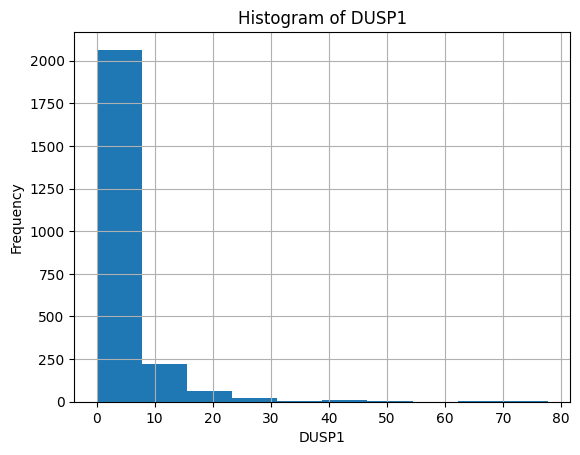

In [8]:
seqData['DUSP1'].hist()
plt.xlabel('DUSP1')
plt.ylabel('Frequency')
plt.title('Histogram of DUSP1')
plt.show()


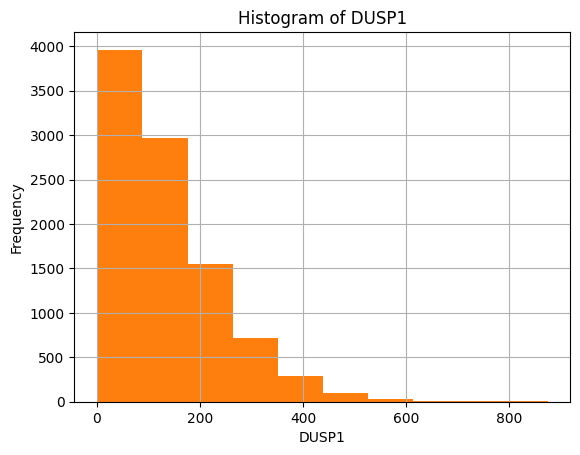

In [9]:
seqData['DUSP1'].hist()
ericData['RNA_total'].hist()
plt.xlabel('DUSP1')
plt.ylabel('Frequency')
plt.title('Histogram of DUSP1')
plt.show()

In [10]:
ericDataDist, ericDataBins = np.histogram(ericData['RNA_total'], bins=100, density=True)
seqDataDist, seqDataBins = np.histogram(seqData['DUSP1'], bins=100, density=True)


In [11]:
ericDataBins == seqDataBins

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [12]:
ericDataDist

array([3.22868363e-03, 4.36821902e-03, 5.12790929e-03, 4.80741496e-03,
       5.37718266e-03, 5.06855849e-03, 5.21100041e-03, 4.58188191e-03,
       4.80741496e-03, 4.43943998e-03, 4.41569966e-03, 3.63226908e-03,
       4.11894565e-03, 4.07146501e-03, 3.66787956e-03, 3.38299571e-03,
       3.29990459e-03, 3.34738523e-03, 2.86070865e-03, 2.44525304e-03,
       2.68265625e-03, 2.36216192e-03, 2.14849903e-03, 1.67369261e-03,
       2.19597967e-03, 1.67369261e-03, 1.55499101e-03, 1.43628941e-03,
       1.41254909e-03, 1.27010716e-03, 1.32945796e-03, 9.85223312e-04,
       1.09205476e-03, 9.85223312e-04, 7.71560425e-04, 8.42781387e-04,
       7.83430586e-04, 6.40988661e-04, 5.69767699e-04, 5.22287057e-04,
       5.69767699e-04, 3.79845132e-04, 4.39195934e-04, 4.03585453e-04,
       3.20494330e-04, 2.73013689e-04, 2.13662887e-04, 2.61143529e-04,
       3.20494330e-04, 2.37403208e-04, 1.54312085e-04, 1.42441925e-04,
       2.25533047e-04, 1.06831443e-04, 4.74806415e-05, 1.54312085e-04,
      

PDM

In [13]:
PDM = np.zeros((len(seqDataDist), len(ericDataDist)))
q = 1 - 1/36

for i in range(PDM.shape[0]):
    for j in range(PDM.shape[1]):
        if i <= j:
            PDM[i,j] = q**i * (1-q)**(j-i) * math.factorial(int(j))/(math.factorial(int(i))*math.factorial(int(j-i)))



In [14]:
PDM = np.outer(seqDataDist, ericDataDist)


In [15]:
PDM

array([[1.33593846e-03, 1.80744615e-03, 2.12178461e-03, ...,
        4.91153844e-06, 0.00000000e+00, 4.91153844e-06],
       [7.48541449e-04, 1.01273255e-03, 1.18885995e-03, ...,
        2.75199062e-06, 0.00000000e+00, 2.75199062e-06],
       [4.31450875e-04, 5.83727654e-04, 6.85245507e-04, ...,
        1.58621645e-06, 0.00000000e+00, 1.58621645e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.46545291e-06, 4.68855394e-06, 5.50395462e-06, ...,
        1.27406357e-08, 0.00000000e+00, 1.27406357e-08]])

In [16]:
newCounts = np.dot(seqDataDist, PDM)

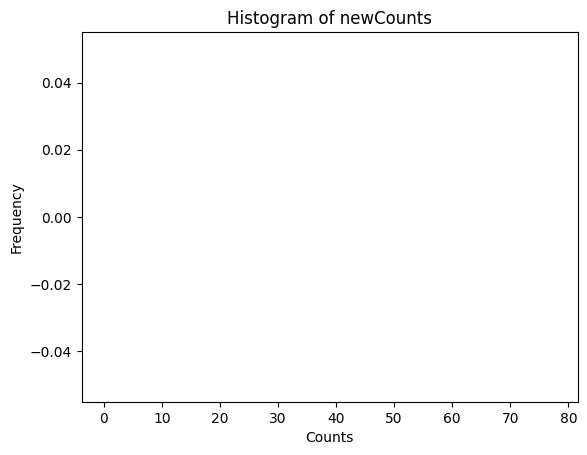

In [26]:
plt.hist(newCounts, bins=seqDataBins)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram of newCounts')
plt.show()


In [24]:
#np.sum(newCounts - seqAdata)

In [27]:
newCounts

array([8.55382578e-04, 1.15728231e-03, 1.35854880e-03, 1.27363950e-03,
       1.42458937e-03, 1.34282486e-03, 1.38056232e-03, 1.21388851e-03,
       1.27363950e-03, 1.17615104e-03, 1.16986147e-03, 9.62305400e-04,
       1.09124174e-03, 1.07866259e-03, 9.71739767e-04, 8.96264834e-04,
       8.74251311e-04, 8.86830467e-04, 7.57894122e-04, 6.47826511e-04,
       7.10722289e-04, 6.25812989e-04, 5.69206789e-04, 4.43415233e-04,
       5.81785945e-04, 4.43415233e-04, 4.11967345e-04, 3.80519456e-04,
       3.74229878e-04, 3.36492411e-04, 3.52216356e-04, 2.61017478e-04,
       2.89320578e-04, 2.61017478e-04, 2.04411278e-04, 2.23280011e-04,
       2.07556067e-04, 1.69818600e-04, 1.50949867e-04, 1.38370711e-04,
       1.50949867e-04, 1.00633244e-04, 1.16357189e-04, 1.06922822e-04,
       8.49093000e-05, 7.23301445e-05, 5.66062000e-05, 6.91853556e-05,
       8.49093000e-05, 6.28957778e-05, 4.08822556e-05, 3.77374667e-05,
       5.97509889e-05, 2.83031000e-05, 1.25791556e-05, 4.08822556e-05,
      

In [28]:
ericDataDist

array([3.22868363e-03, 4.36821902e-03, 5.12790929e-03, 4.80741496e-03,
       5.37718266e-03, 5.06855849e-03, 5.21100041e-03, 4.58188191e-03,
       4.80741496e-03, 4.43943998e-03, 4.41569966e-03, 3.63226908e-03,
       4.11894565e-03, 4.07146501e-03, 3.66787956e-03, 3.38299571e-03,
       3.29990459e-03, 3.34738523e-03, 2.86070865e-03, 2.44525304e-03,
       2.68265625e-03, 2.36216192e-03, 2.14849903e-03, 1.67369261e-03,
       2.19597967e-03, 1.67369261e-03, 1.55499101e-03, 1.43628941e-03,
       1.41254909e-03, 1.27010716e-03, 1.32945796e-03, 9.85223312e-04,
       1.09205476e-03, 9.85223312e-04, 7.71560425e-04, 8.42781387e-04,
       7.83430586e-04, 6.40988661e-04, 5.69767699e-04, 5.22287057e-04,
       5.69767699e-04, 3.79845132e-04, 4.39195934e-04, 4.03585453e-04,
       3.20494330e-04, 2.73013689e-04, 2.13662887e-04, 2.61143529e-04,
       3.20494330e-04, 2.37403208e-04, 1.54312085e-04, 1.42441925e-04,
       2.25533047e-04, 1.06831443e-04, 4.74806415e-05, 1.54312085e-04,
      